In [1]:
import sklearn
import statsmodels
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

- Definisikan Masalah terkait bisnis yang ingin anda selesaikan (Define Business Problem)
- Definisikan Tujuan EDA anda (Define Goals)
- Analisa Deskriptif & Handling Missing Value serta Outliers
- Analisis Data (Univariate dan Multivariate, Gunakan Crosstab atau Pivot_Table atau Group by )
- Visualisasi Data (Univariate dan Multivariate, Gunakan plot sesuai dengan fungsi dan tujuannya) 
- Temukan Insight data berdasarkan Analisis dan Visualisasi yang telah anda lakukan 
- Kesimpulan dan Saran yang dapat anda berikan berdasarkan hasil EDA anda

In [3]:
df=pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


- we can see that the maximum age of this dataset is 85

In [7]:
df.describe(include='object')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [8]:
insuranceDesc=[]
for i in df.columns:
    insuranceDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        (df[i].value_counts()/len(df)*100).round(2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
    ])

In [9]:
pd.DataFrame(data=insuranceDesc,columns=[
    'Data Feature',
    'Data Types',
    'Null',
    'Null Pct',
    'unique',
    'unique sample'
])

,Data Feature,Data Types,Null,Null Pct,unique,unique sample
0,id,int64,0,2047 0.0 295621 0.0 84604 0.0 8255...,381109,"[331831, 166030]"
1,Gender,object,0,"Male 54.08 Female 45.92 Name: Gender, ...",2,"[Male, Female]"
2,Age,int64,0,24 6.81 23 6.36 22 5.50 25 5.41 21...,66,"[34, 54]"
3,Driving_License,int64,0,"1 99.79 0 0.21 Name: Driving_License, d...",2,"[0, 1]"
4,Region_Code,float64,0,28.0 27.92 8.0 8.89 46.0 5.18 41.0...,53,"[47.0, 19.0]"
5,Previously_Insured,int64,0,0 54.18 1 45.82 Name: Previously_Insured...,2,"[0, 1]"
6,Vehicle_Age,object,0,1-2 Year 52.56 < 1 Year 43.24 > 2 Year...,3,"[< 1 Year, 1-2 Year]"
7,Vehicle_Damage,object,0,Yes 50.49 No 49.51 Name: Vehicle_Damage...,2,"[Yes, No]"
8,Annual_Premium,float64,0,2630.0 17.02 69856.0 0.04 39008.0 ...,48838,"[19755.0, 20383.0]"
9,Policy_Sales_Channel,float64,0,152.0 35.37 26.0 20.91 124.0 19.42 1...,155,"[104.0, 40.0]"


- the dataset do not have a null value

# analytics and visualization

In [11]:
pd.crosstab(df['Gender'],columns='amount')

col_0,amount
Gender,
Female,175020
Male,206089


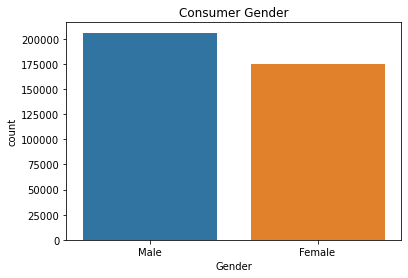

In [12]:
sns.countplot(df['Gender'])
plt.title('Consumer Gender')

plt.show()

In [13]:
(pd.crosstab(index=df['Gender'],columns='amount',normalize='all')/100).round(2)

col_0,amount
Gender,
Female,0.00
Male,0.01


In [14]:
pd.crosstab(index=df['Gender'],columns='amount',normalize='all')

col_0,amount
Gender,
Female,0.459239
Male,0.540761


- mostly male in this dataset

In [15]:
#gender and age

In [16]:
#binning age
df['Age_cluster']=pd.cut(df['Age'],bins=[19,65,85],labels=['adult','eldery'])

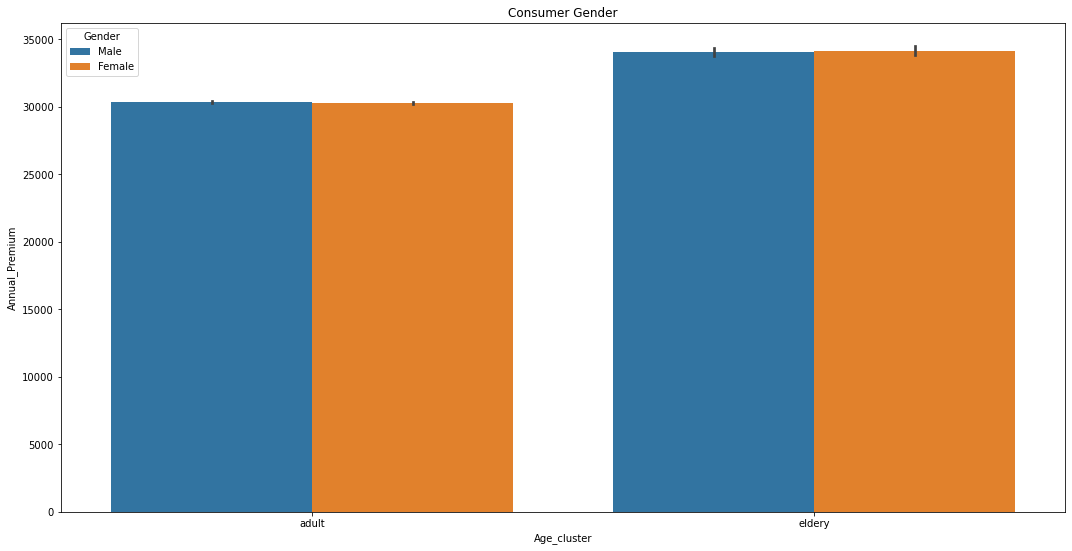

In [17]:
plt.figure(figsize=(18,9))
sns.barplot(y=df['Annual_Premium'],x=df['Age_cluster'],hue=df['Gender'])
plt.title('Consumer Gender')

plt.show()

- eldery plot has the highert annual premium
- male and female in adult, it seems like has a same amount. male has the little gap between it 
- female in eldery has the higher score than male

In [18]:
#gender and vehicle damage

<Figure size 1080x1080 with 0 Axes>

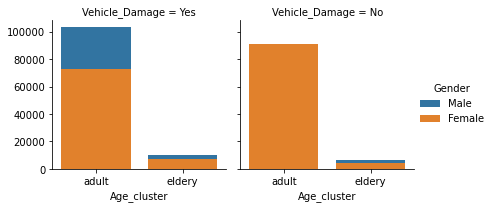

In [19]:
plt.figure(figsize=(15,15))
sns.FacetGrid(df, col='Vehicle_Damage', hue='Gender').map(sns.countplot, 'Age_cluster').add_legend()
plt.show()

- the data above that adult female and eldery female have not damage their vehicle
- adult and eldery male mostly have damage their vehicle

# boxplot

In [20]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_cluster
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,adult
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,eldery
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,adult
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,adult
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,adult


In [21]:
df.dtypes

id                         int64
Gender                    object
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age               object
Vehicle_Damage            object
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
Age_cluster             category
dtype: object

- there still object so we should encoding it

In [22]:
# encoding

In [23]:
df['Gender'].nunique

<bound method IndexOpsMixin.nunique of 0           Male
1           Male
2           Male
3           Male
4         Female
           ...  
381104      Male
381105      Male
381106      Male
381107    Female
381108      Male
Name: Gender, Length: 381109, dtype: object>

In [24]:
df['Gender_New']=df['Gender'].map({'Female':0,'Male':1})

In [25]:
#VEHICLE AGE
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [26]:
df['Vehicle_Age_new']=df['Vehicle_Age'].map({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})

In [27]:
#Vehicle_Damage
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df['Vehicle_Damage_New']=df['Vehicle_Damage'].map({'No':0,'Yes':1})

In [29]:
#annual premium
df['Premium_cluster'] = pd.cut(df['Annual_Premium'], bins=[0,31669,550000000], labels=['<=31669','>31669'])

In [30]:
df['Premium_new'] = df['Premium_cluster'].map({'<=31669':0, '>31669':1})

In [31]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_cluster,Gender_New,Vehicle_Age_new,Vehicle_Damage_New,Premium_cluster,Premium_new
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,adult,1,2,1,>31669,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,eldery,1,1,0,>31669,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,adult,1,2,1,>31669,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,adult,1,0,0,<=31669,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,adult,0,0,0,<=31669,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0,eldery,1,1,0,<=31669,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0,adult,1,0,0,>31669,1
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0,adult,1,0,0,>31669,1
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0,eldery,0,2,1,>31669,1


In [32]:
df.dtypes

id                         int64
Gender                    object
Age                        int64
Driving_License            int64
Region_Code              float64
Previously_Insured         int64
Vehicle_Age               object
Vehicle_Damage            object
Annual_Premium           float64
Policy_Sales_Channel     float64
Vintage                    int64
Response                   int64
Age_cluster             category
Gender_New                 int64
Vehicle_Age_new            int64
Vehicle_Damage_New         int64
Premium_cluster         category
Premium_new             category
dtype: object

In [33]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_cluster,Gender_New,Vehicle_Age_new,Vehicle_Damage_New,Premium_cluster,Premium_new
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,adult,1,2,1,>31669,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,eldery,1,1,0,>31669,1
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,adult,1,2,1,>31669,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,adult,1,0,0,<=31669,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,adult,0,0,0,<=31669,0


In [34]:
df.drop(columns=['id','Gender','Age','Vehicle_Age','Vehicle_Damage','Premium_cluster'], inplace=True)

In [35]:
df.drop(columns=['Age_cluster'], inplace=True)

In [37]:
df['Premium_new'] = df['Premium_new'].astype('int')

In [38]:
df.dtypes

Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Gender_New                int64
Vehicle_Age_new           int64
Vehicle_Damage_New        int64
Premium_new               int64
dtype: object

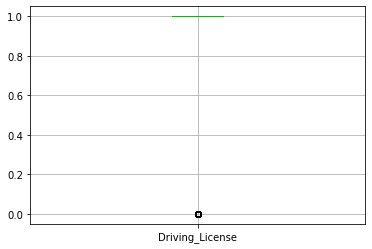

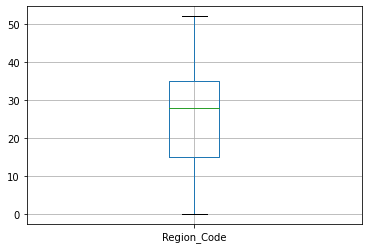

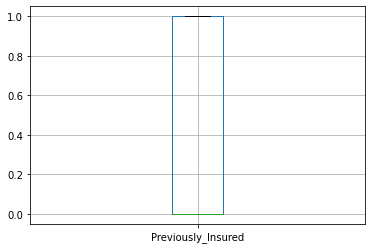

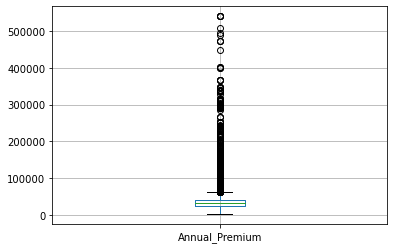

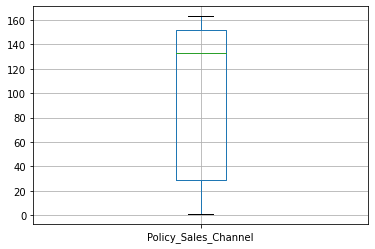

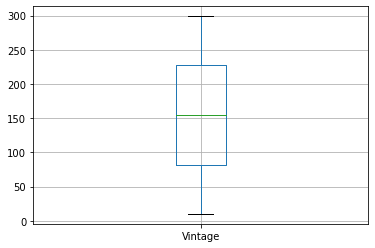

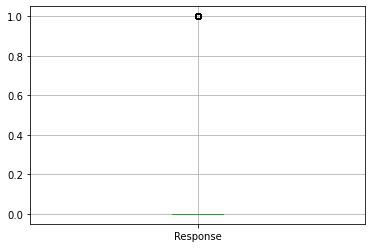

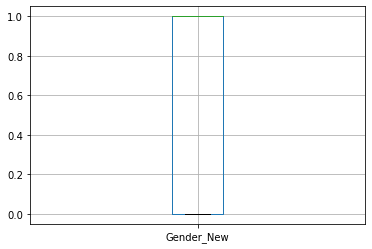

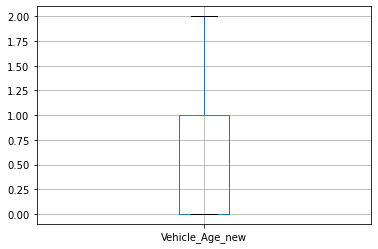

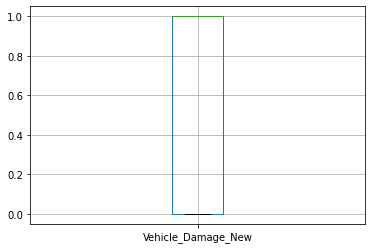

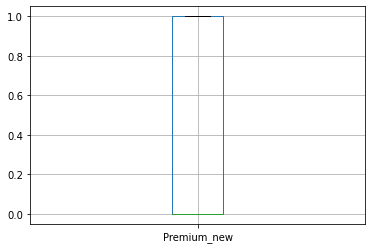

In [39]:
for column in df:
    plt.figure()
    df.boxplot([column])
plt.show()

- the outliers doesnt bother the model

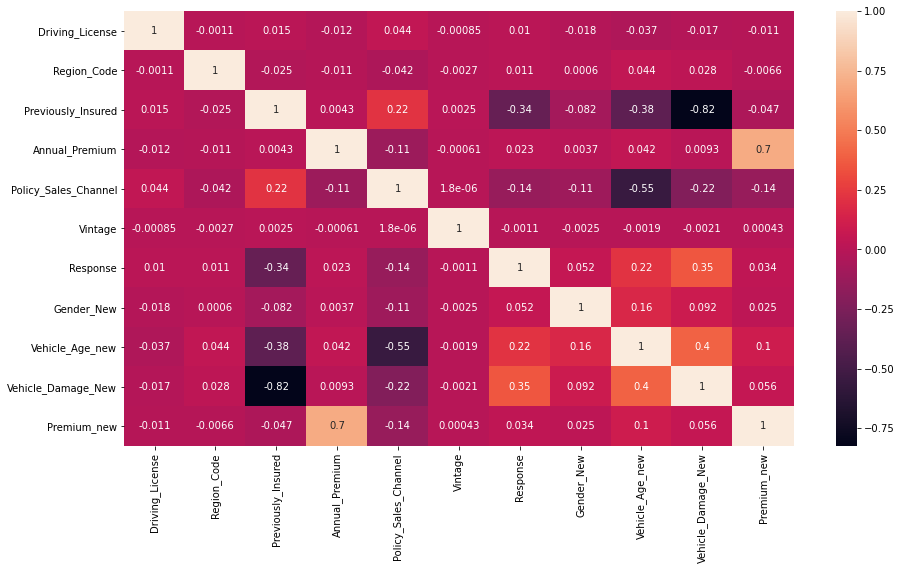

In [40]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

- after seeing the correlation we should drop two column(policy_sales_channel and vintage,and previously_insured)

# export

In [41]:
df.to_csv(r'/Users/risyad/Desktop/code modul 3/exam/incurance_new.csv')